# EDA

###  - df[0] : CPU와 GPU의 2004 ~ 2021까지의 데이터 프레임
####  <U>columns</U>  
          Process Size(nm): CPU와 GPU의 공정 크기이다. 단위는 나노 단위이다.
          Transistors (million) : 전자 신호 및 전력을 증폭하거나 스위칭하는 데 사용되는 반도체 소자의 데이터이다.
          Freq (MHz) : CPU와 GPU의 주파수를 측정한 데이터이다. 단위는 MHz이다.

#### <U>df[0]의 대략적인 분석 - pairplot 이용</U> 
>***- 대략적으로는 CPU끼리, GPU끼리 상관성이 있다.*** 
>>**특이점** 
>> 1. CPU와 GPU의 Process Size(nm) 상관성을 보인다.
>> 2. CPU의 Process Size(nm)와 GPU의 Freq (MHz)도 높은 상관성을 보인다.
>> 3. CPU와 GPU의 Freq (MHz) 상관성을 보인다.


### - df[1] : 한국 반도체, 디스플레이, DRAM시장과 CPU와 GPU의 연관성을 보기 위한 데이터프레임
##### <U>columns</U>  
           1. 반도체 시장 : 반도체_생산(조원), 반도체_시장점유율(퍼센트), 반도체_수출(억불), 반도체_수출증가율(퍼센트), 반도체_수입(억불),	
                           반도체_수입증가율(퍼센트)
                           
           2. DRAM 시장 : DRAM_가격(달러)
           
           3. 디스플레이 시장 : 디스플레이_생산(조원), 디스플레이_시장점유율(퍼센트), 디스플레이_수출(억불),	
                               디스플레이_수출증가율(퍼센트), 디스플레이_수입(억불), 디스플레이_수입증가율(퍼센트), LCD_평균가격(달러)
           
##### <U>df[1]의 대략적인 분석 - pairplot 이용</U>
>***반도체는 CPU와 GPU시장에 모두 높은 상관성을 보이지만, 디스플레이는 GPU의 Trnasistor과 조금 더 높은 상관성을 보인다.***
>
>***예외적으로 DRAM*** 은 모두 낮은 상관도를 보인다.

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [72]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [75]:
with open('mydataframe.pickle', 'rb') as f:
    df = pickle.load(f)
    
df[0]

,Process Size(nm)_CPU,Process Size(nm)_GPU,Transistors (million)_CPU,Transistors (million)_GPU,Freq (MHz)_CPU,Freq (MHz)_GPU
년도,,,,,,
2004,109.705882,121.384615,104.213235,332.938462,2267.705882,367.376923
2005,92.954545,112.315789,230.584416,294.684211,2409.831169,405.273684
2006,75.925926,93.178295,478.266667,348.031008,2370.696296,460.472868
2007,70.869565,80.031646,398.014493,388.797468,2180.652174,524.360759
2008,58.571429,63.439306,606.089286,566.826590,2287.241071,564.190751
2009,45.913043,52.783019,533.860870,613.830189,2519.904348,584.584906
2010,40.576389,42.870748,539.958333,972.979592,2477.243056,613.741497
2011,33.465409,39.280702,976.616352,1228.198830,2355.496855,641.356725
2012,27.455696,33.653179,1602.253165,1685.982659,2604.468354,696.046243


/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


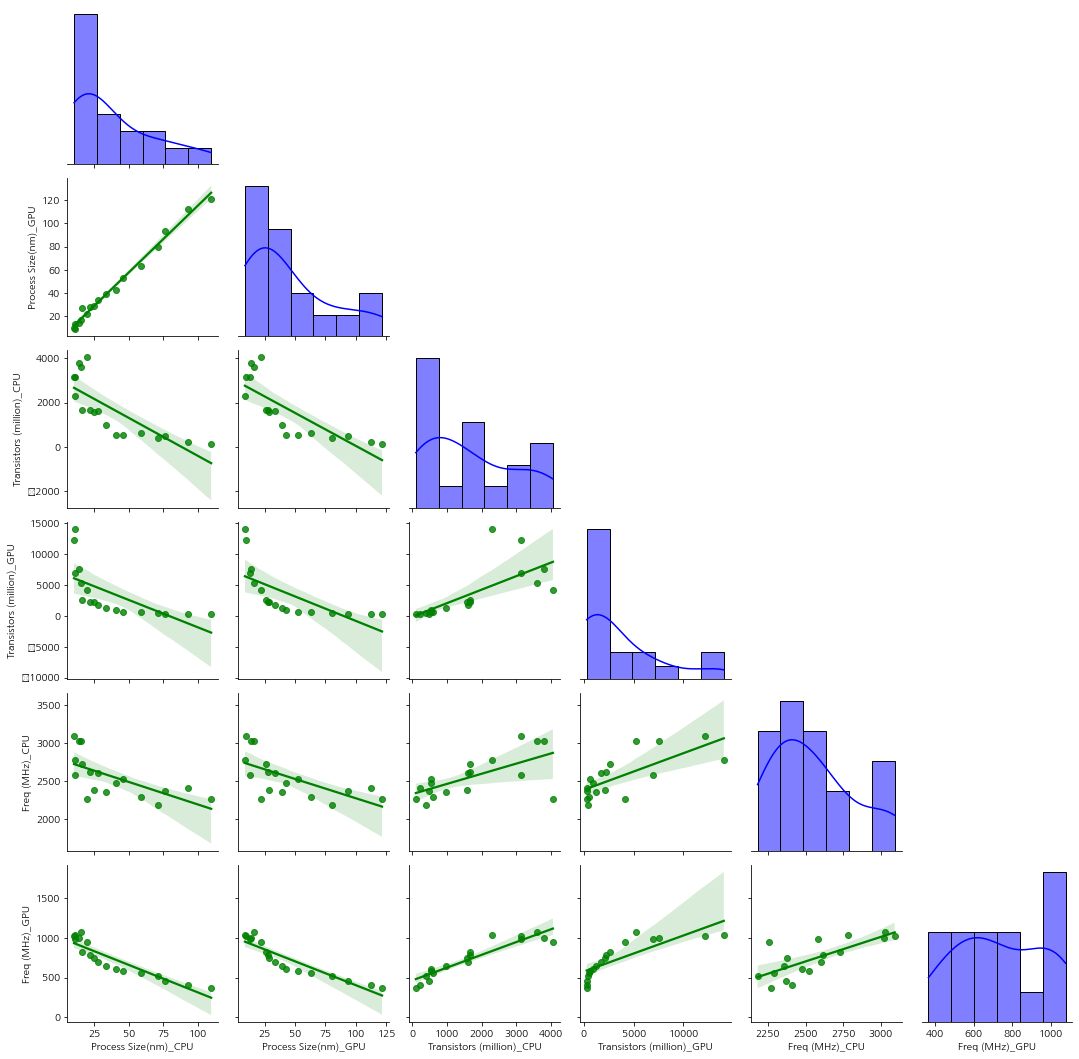

In [76]:
# df[0] == CPU and GPU, df[1] == 한국 산업 + df[0], df[2] == phone price 

g = sns.PairGrid(data = df[0], diag_sharey=False, corner=True)
g.map_diag(sns.histplot, kde = True, color = 'b')
g.map_lower(sns.regplot, color = 'g')

In [77]:
# df[1]
df_copy = df[1].drop(['반도체_수출증가율(퍼센트)', '디스플레이_수출증가율(퍼센트)', '반도체_수입증가율(퍼센트)', '디스플레이_수입증가율(퍼센트)'], axis=1)
df_copy

,반도체_생산(조원),반도체_시장점유율(퍼센트),반도체_수출(억불),반도체_수입(억불),DRAM_가격(달러),디스플레이_생산(조원),디스플레이_시장점유율(퍼센트),디스플레이_수출(억불),디스플레이_수입(억불),LCD_평균가격(달러),Process Size(nm)_CPU,Process Size(nm)_GPU,Transistors (million)_CPU,Transistors (million)_GPU,Freq (MHz)_CPU,Freq (MHz)_GPU
년도,,,,,,,,,,,,,,,,
2004,34.60,9.6,265.2,236.2,1.72,33.00,38.7,14,10,28.9,109.71,121.38,104.21,332.94,2267.71,367.38
2005,32.40,10.5,299.8,251.3,2.16,36.00,40.7,49,10,28.0,92.95,112.32,230.58,294.68,2409.83,405.27
2006,32.40,11.3,373.6,280.4,1.59,40.60,40.6,125,12,25.8,75.93,93.18,478.27,348.03,2370.70,460.47
2007,37.50,11.4,390.4,308.2,2.17,43.60,40.4,171,30,23.8,70.87,80.03,398.01,388.80,2180.65,524.36
2008,36.40,9.8,327.9,320.2,0.93,51.90,39.5,188,39,30.1,58.57,63.44,606.09,566.83,2287.24,564.19
2009,40.80,11.7,310.4,266.2,0.66,72.60,45.3,256,42,28.6,45.91,52.78,533.86,613.83,2519.90,584.58
2010,51.20,14.3,507.1,311.4,1.20,90.00,45.7,332,52,31.9,40.58,42.87,539.96,972.98,2477.24,613.74
2011,61.50,13.8,501.4,324.8,0.60,86.70,47.6,333,51,30.1,33.47,39.28,976.62,1228.20,2355.50,641.36
2012,64.50,14.3,504.3,322.4,1.60,82.30,50.7,368,45,34.7,27.46,33.65,1602.25,1685.98,2604.47,696.05


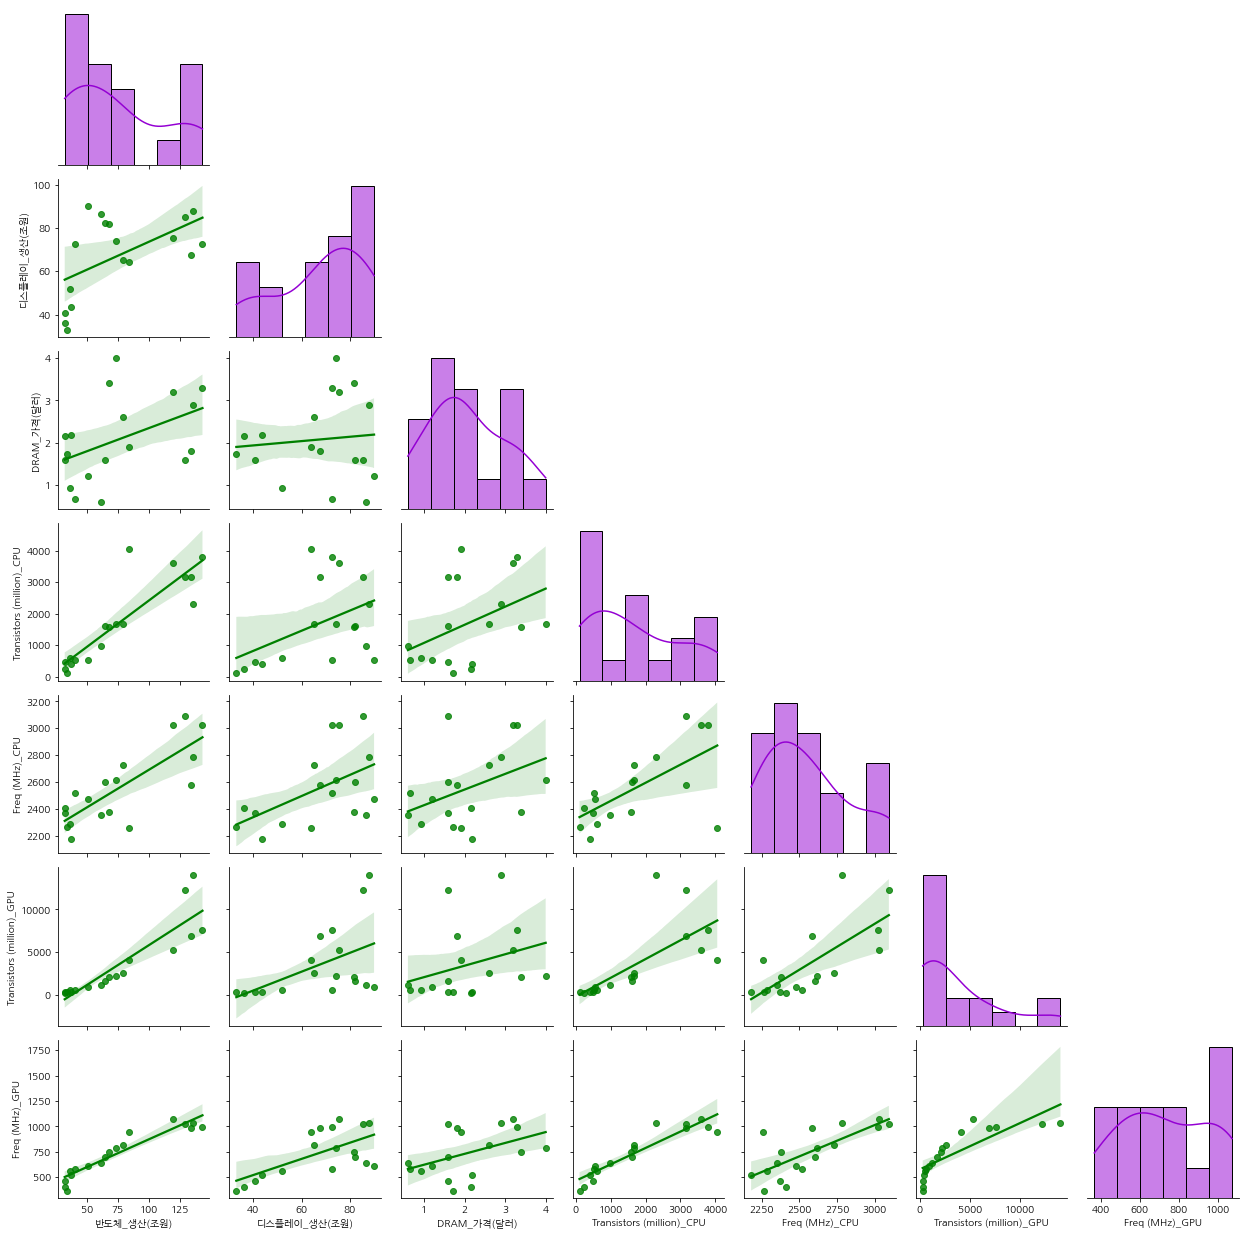

In [78]:
df_CPU = df_copy[['반도체_생산(조원)', '디스플레이_생산(조원)','DRAM_가격(달러)','Transistors (million)_CPU', 'Freq (MHz)_CPU', 'Transistors (million)_GPU', 'Freq (MHz)_GPU']]
j = sns.PairGrid(data = df_CPU, diag_sharey=False, corner=True)
j.map_diag(sns.histplot, kde = True, color = 'darkviolet')
j.map_lower(sns.regplot, color = 'g')

In [93]:
#j = sns.JointGrid(data = df_copy, x = '반도체_생산(조원)', y = 'Freq (MHz)_CPU')
#j.plot_joint(sns.regplot, color = 'darkviolet')
#j.plot_marginals(sns.boxplot, color = 'darkviolet')

semi_CPUT = np.corrcoef(df_copy['반도체_생산(조원)'], df_copy['Transistors (million)_CPU'])[0,1]
print('반도체 생산과 CPU Transistors의 상관도:', semi_CPUT)

semi_GPUF = np.corrcoef(df_copy['반도체_생산(조원)'], df_copy['Freq (MHz)_GPU'])[0,1]
print('반도체 생산과 GPU 주파수의 상관도:', semi_GPUF)


DIS_GPUF = np.corrcoef(df_copy['디스플레이_생산(조원)'], df_copy['Freq (MHz)_GPU'])[0,1]
print('디스플레이 생산과 GPU 주파수의 상관도:', DIS_GPUF)

DIS_GPUT = np.corrcoef(df_copy['반도체_생산(조원)'], df_copy['Transistors (million)_GPU'])[0,1]
print('디스플레이 생산과 GPU Transistors의 상관도:', DIS_GPUT)

#DRAM_GPUF = np.corrcoef(df_copy['DRAM_가격(달러)'], df_copy[''])[0,1]
#print(DRAM_GPUF)


반도체 생산과 CPU Transistors의 상관도: 0.8800596065609847
반도체 생산과 GPU 주파수의 상관도: 0.9434774730073472
디스플레이 생산과 GPU 주파수의 상관도: 0.6398474219449948
디스플레이 생산과 GPU Transistors의 상관도: 0.8923610689117795


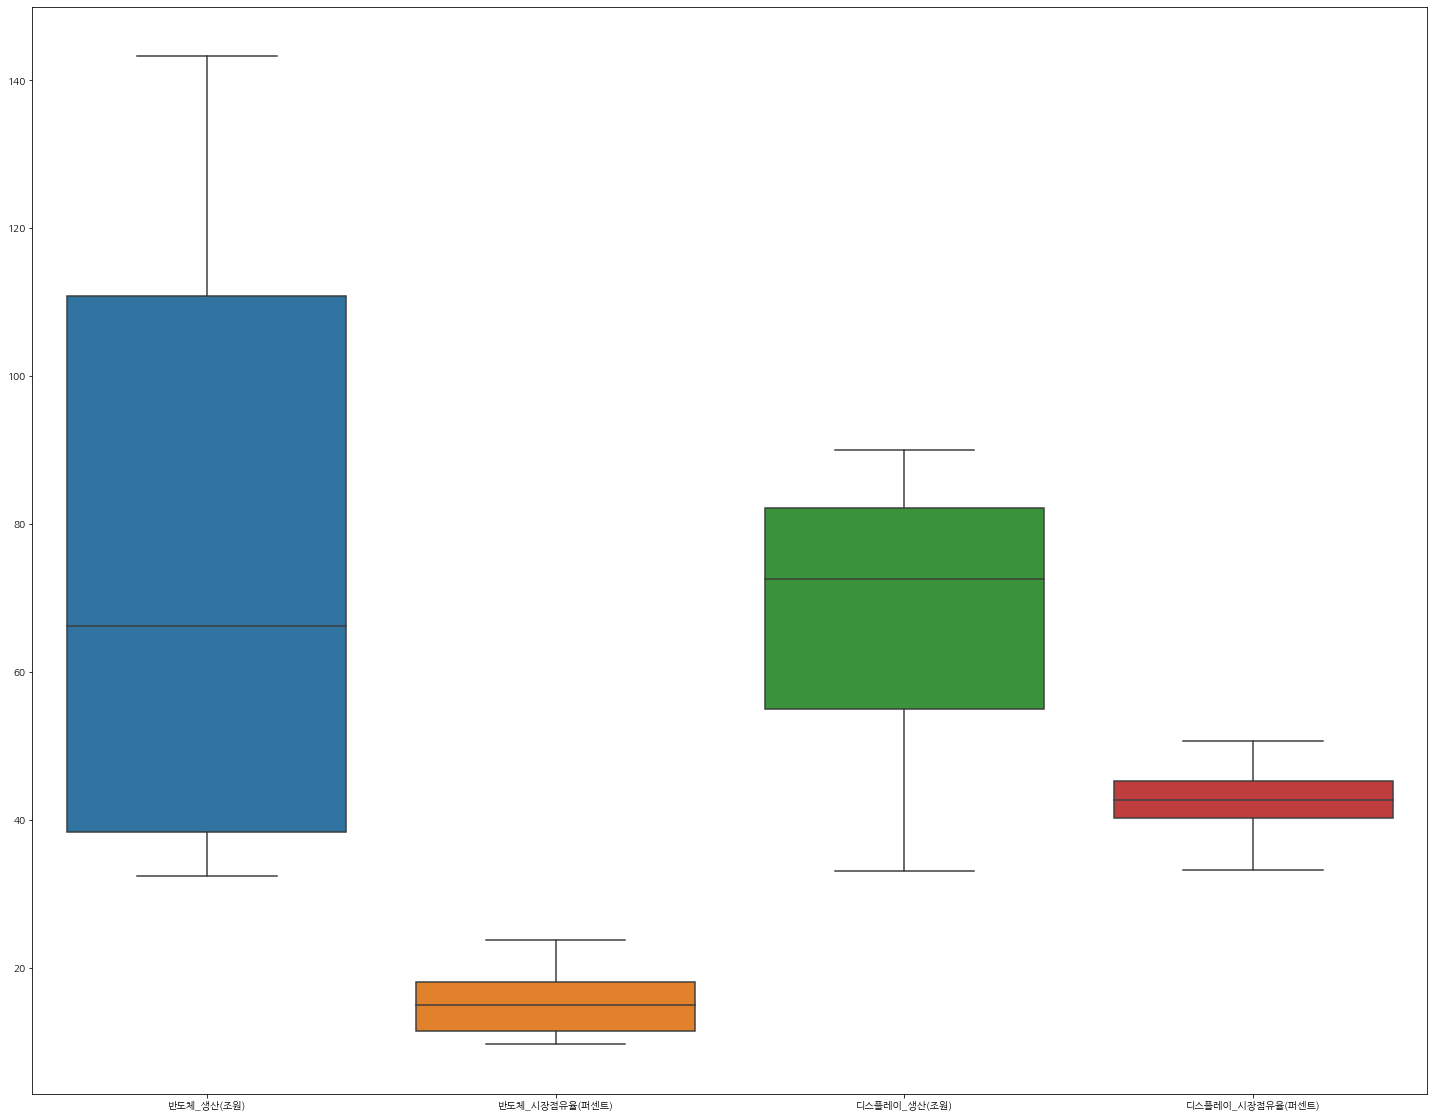

In [80]:
fig, axes = plt.subplots(figsize = (25, 20))

a = sns.boxplot(data = df_copy[['반도체_생산(조원)', '반도체_시장점유율(퍼센트)', '디스플레이_생산(조원)', '디스플레이_시장점유율(퍼센트)']])

# 반도체 생산 조원이 디스플레이보다 훨씬 많은 금액이 투자 되는 중이다.
# 또한 반도체 시장 점유율보다 디스플레이 시장 점유율이 더 높다.

In [ ]:
df_copy = df_copy.reset_index()

/tmp/ipykernel_4024/1400720721.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axe.set_xticklabels(df_copy['년도'], rotation = 45)


Text(0.5, 1.0, 'DRAM가격 밀집도')

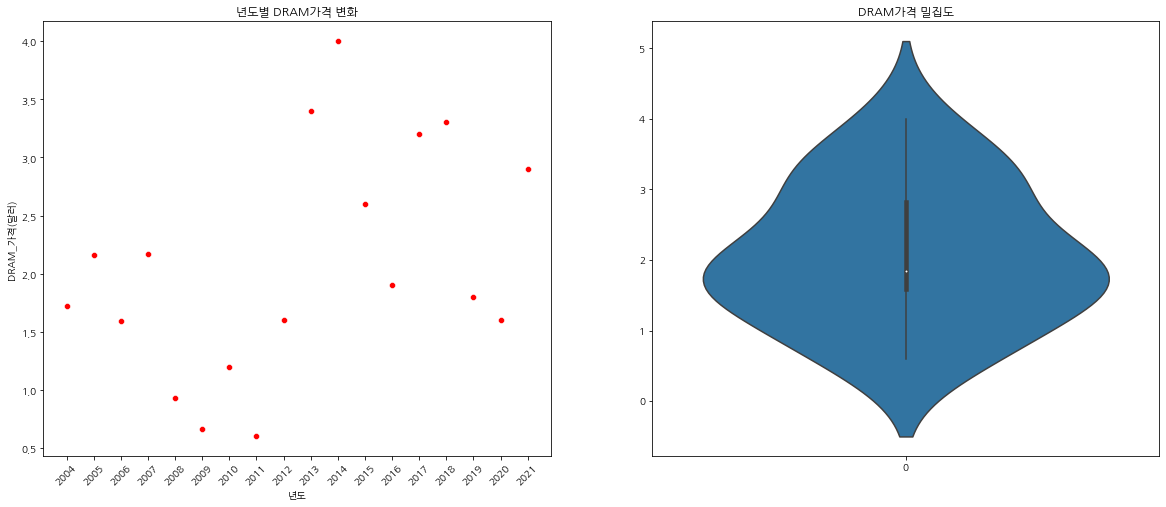

In [92]:
fig, axes = plt.subplots(1,2, figsize = (20,8))

c = sns.scatterplot(data = df_copy, x = '년도', y = 'DRAM_가격(달러)', c = 'r', ax =axes[0])

d = sns.violinplot(data = df_copy['DRAM_가격(달러)'], ax =axes[1])

axe = c.axes
axe.set_xticklabels(df_copy['년도'], rotation = 45)
axes[0].set_title('년도별 DRAM가격 변화')

axes[1].set_title('DRAM가격 밀집도')

In [40]:
pprice = df[2].reset_index().drop(['company'], axis = 1)
pprice = pprice.groupby(['년도'])
pprice = pprice.mean()

Text(0.5, 1.0, '년도별 스마트폰 가격 변화 추이')

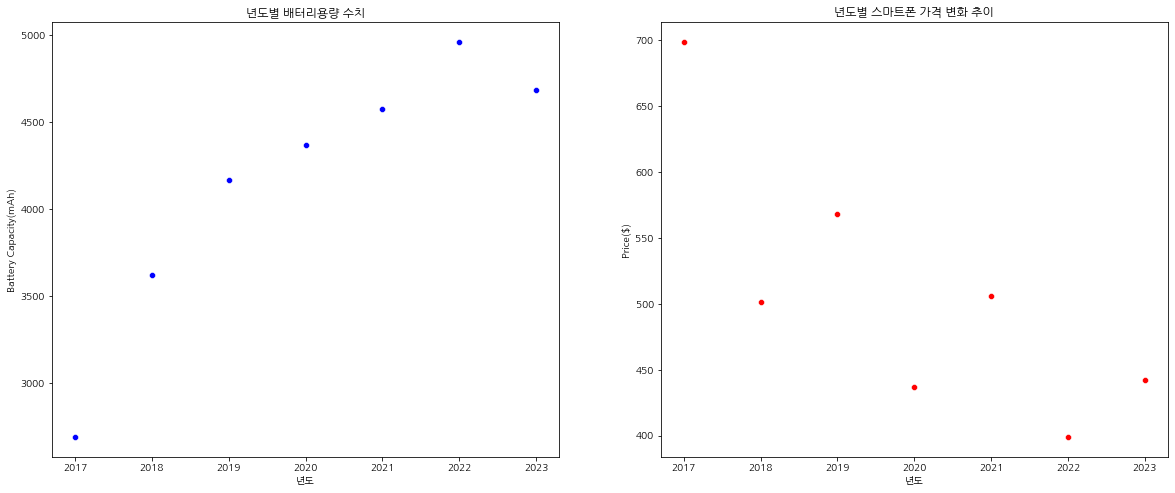

In [91]:
fig, axes = plt.subplots(1,2, figsize = (20,8))

a = sns.scatterplot(data = pprice, x = '년도', y = 'Battery Capacity(mAh)', c = 'b', ax = axes[0])
b = sns.scatterplot(data = pprice, x = '년도', y = 'Price($)', c = 'r', ax = axes[1])

axes[0].set_title('년도별 배터리용량 수치')
axes[1].set_title('년도별 스마트폰 가격 변화 추이')

In [52]:
corr = np.corrcoef(pprice['Battery Capacity(mAh)'], pprice['Price($)'])[0,1]

print('휴대폰 가격과 배터리 용량의 상관도 : ', corr)

# 배터리 용량이 늘어날수록 가격은 싸진다?

휴대폰 가격과 배터리 용량의 상관도 :  -0.8835040566299962
